In [37]:
# Modul gpxpy laden und Dateien damit einlesen (snippets von https://pypi.org/project/gpxpy/)
import gpxpy
import gpxpy.gpx
import pandas as pd
import numpy as np

In [31]:
def read_gpx(filename):
    gpx_file = open(filename, 'r')
    gpx = gpxpy.parse(gpx_file)
    return gpx

In [32]:
gpx=read_gpx('activity_zoo.gpx')

- Funktionen in gpxo beheben 

In [34]:
track = 0
segment = 0 

In [38]:
elevation = np.array([pt.elevation for pt in pts])

In [41]:
elevation[1].dtype

dtype('float64')

In [45]:
elevation

array([610.59997559, 610.59997559, 610.59997559, 610.59997559,
       610.59997559, 608.20001221, 607.59997559, 607.20001221,
       607.20001221, 606.40002441, 606.20001221, 604.40002441,
       602.59997559, 602.        , 600.        , 598.20001221,
       597.        , 594.79998779, 592.        , 591.        ,
       590.40002441, 589.79998779, 589.40002441, 587.40002441,
       587.40002441, 587.        , 585.59997559, 585.59997559,
       584.59997559, 583.40002441, 581.40002441, 581.20001221,
       579.40002441, 577.79998779, 575.20001221, 573.59997559,
       571.20001221, 568.59997559, 567.40002441, 565.59997559,
       563.40002441, 561.79998779, 558.79998779, 556.59997559,
       555.        , 554.20001221, 553.        , 551.        ,
       550.        , 549.59997559, 547.79998779, 547.40002441,
       545.79998779, 545.40002441, 543.59997559, 541.20001221,
       540.59997559, 538.79998779, 538.        , 537.        ,
       536.59997559, 535.40002441, 535.40002441, 535.59

In [51]:
heartrate = np.array([pt.extensions[0][1].text for pt in pts], dtype="float64")

In [52]:
heartrate.

array([ 79.,  79.,  78.,  79.,  79.,  79.,  79.,  79.,  79.,  80.,  80.,
        80.,  81.,  80.,  80.,  81.,  81.,  82.,  82.,  85.,  86.,  89.,
        94.,  95.,  96., 101., 106., 106., 107., 107., 110., 112., 114.,
       115., 115., 115., 113., 112., 112., 112., 110., 107., 106., 107.,
       107., 107., 107., 107., 107., 107., 106., 103., 103.,  98.,  96.,
        96.,  94.,  95.,  95.,  95.,  95.,  95.,  96.,  97.,  97.,  97.,
        97.,  97.,  99.,  99., 100., 101., 102., 103., 103., 102., 103.,
       103., 103., 104., 104., 104., 104., 105., 105., 105., 105., 103.,
       103., 102., 100.,  99.,  98.,  96.,  95.,  95.,  94.,  94.,  93.,
        93.,  93.,  93.,  93.,  93.,  92.,  90.,  89.,  88.,  89.,  90.,
        91.,  91.,  92.,  92.,  92.,  92.,  92.,  92.,  93.,  93.,  92.,
        91.,  91.,  90.,  91.,  93.,  93.,  93.,  94.,  95.,  95.,  95.,
        95.,  95.,  95.,  94.,  94.,  95.,  94.,  94.,  94.,  96.,  97.,
        96.,  93.,  93.,  93.,  93.,  92.,  93.,  9

In [35]:
pts = gpx.tracks[track].segments[segment].points

In [30]:
def create_df(gpx):
#create a pandas dataframe from a gpx-object
    df_list = []
    for track in gpx.tracks:
        for segment in track.segments:
            for no,point in enumerate(segment.points):
                df_list.append((point.time,point.latitude, point.longitude, point.elevation, point.extensions[0][1].text, point.speed_between(segment.points[no-1])*3.6)) # * 3.6 -> m/ in km/h
    df = pd.DataFrame.from_records(df_list, columns=['time','latitude', 'longitude','elevation', 'heartrate', 'speed'])
    df.loc[0,'speed'] = 0 # correct speed of first item (would be no-1)
    return df

In [31]:
df=create_df(gpx)

In [99]:
df

,time,latitude,longitude,elevation,heartrate,speed
0,2022-03-29 18:29:58+00:00,47.381873,8.571840,610.599976,79,0.000000
1,2022-03-29 18:29:59+00:00,47.381875,8.571839,610.599976,79,0.723684
2,2022-03-29 18:30:04+00:00,47.381872,8.571833,610.599976,78,0.361601
3,2022-03-29 18:30:05+00:00,47.381850,8.571809,610.599976,79,10.943950
4,2022-03-29 18:30:06+00:00,47.381818,8.571783,610.599976,79,14.762307
...,...,...,...,...,...,...
223,2022-03-29 18:36:11+00:00,47.367919,8.545223,413.000000,132,14.948315
224,2022-03-29 18:36:12+00:00,47.367918,8.545187,413.000000,132,9.672669
225,2022-03-29 18:36:13+00:00,47.367955,8.545149,413.000000,132,18.099328
226,2022-03-29 18:36:15+00:00,47.368054,8.545060,413.000000,131,23.268344


In [67]:
gpx.get_moving_data()

MovingData(moving_time=365.0, stopped_time=16.0, moving_distance=3656.21994253435, stopped_distance=1.6777610888304357, max_speed=13.545822695796227)

In [130]:
def create_df(gpx):
#create a pandas dataframe from a gpx-object
    df_list = []
    for track in gpx.tracks:
        for segment in track.segments:
            for no,point in enumerate(segment.points):
                df_list.append((point.time.replace(tzinfo=None),point.latitude, point.longitude, point.elevation, point.extensions[0][1].text,segment.get_speed(no)*3.6)) # * 3.6 -> m/ in km/h
    df = pd.DataFrame.from_records(df_list, columns=['time','latitude', 'longitude','elevation', 'heartrate', 'speed'])
    
    df.set_index("time", inplace=True)
    return df
df2=create_df(gpx)

In [140]:
df2 = df.drop(columns=['latitude', 'longitude','elevation','speed'])

In [145]:
df2.set_index("time", inplace=True)

In [141]:
df2["time"] = df2["time"].dt.tz_localize(None)

In [146]:
df2

,heartrate
time,
2022-03-29 18:29:58,79
2022-03-29 18:29:59,79
2022-03-29 18:30:04,78
2022-03-29 18:30:05,79
2022-03-29 18:30:06,79
...,...
2022-03-29 18:36:11,132
2022-03-29 18:36:12,132
2022-03-29 18:36:13,132


AttributeError: 'NoneType' object has no attribute 'offset'

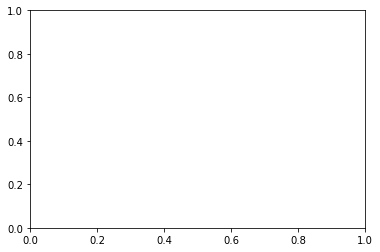

In [100]:
df2.plot(y="elevation")

In [2]:
import gpxo
track = gpxo.Track('activity_1.gpx')

In [3]:
help(track)

Help on Track in module gpxo.track object:

class Track(builtins.object)
 |  Track(filename, track=0, segment=0)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, filename, track=0, segment=0)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  closest_to(self, pt)
 |      Find index of point in trajectory that is closest to pt=(lat, long).
 |  
 |  map(self, map_type='osm', embed=False, ax=None, size=(10, 10), plot='plot', **kwargs)
 |      Plot trajectory on map.
 |      
 |      Parameters
 |      ----------
 |      - map_type can be e.g. osm, esri_aerial, esri_worldtopo, etc. see:
 |      https://github.com/jwass/mplleaflet/blob/master/mplleaflet/maptiles.py
 |      
 |      - embed: if True, embed plot in Jupyter. If False (default), open in
 |      browser.
 |      
 |      - ax: if not None, use provided matplotlib axes.
 |      
 |      - size: when embedded, size of the figure.
 |      
 |      - plot: 'plot' or 'scatter'
 |      
 |      - **k

In [17]:
help(track.plot)

Help on method plot in module gpxo.track:

plot(mode, *args, **kwargs) method of gpxo.track.Track instance
    Plot columns of self.data (use pandas DataFrame plot arguments).
    
    Parameters
    ----------
    - mode (str): 2 letters that define short names for x and y axis
    - *args: any additional argument for matplotlib ax.plot()
    - **kwargs: any additional keyword argument for matplotlib ax.plot()
    
    Output
    ------
    - matplotlib axes
    
    Short names
    -----------
    't': 'time'
    's': 'duration (s)'
    'd': 'distance (km)'
    'v': 'velocity (km/h)'
    'z': 'elevation (m)'
    'c': 'compass (°)'
    'h': 'heartrate (bpm)'



In [4]:
track.data

,latitude (°),longitude (°),distance (km),compass (°),duration (s),velocity (km/h),elevation (m),heartrate (bpm)
time,,,,,,,,
2022-02-23 08:39:36,47.368662,8.547207,0.000000,83.406423,0.0,7.954457,430.000000,120.0
2022-02-23 08:39:43,47.368678,8.547410,0.015467,81.915654,7.0,6.587177,430.200012,119.0
2022-02-23 08:39:46,47.368686,8.547476,0.020468,105.451733,10.0,8.455500,430.600006,121.0
2022-02-23 08:39:47,47.368671,8.547501,0.023044,116.425114,11.0,9.110400,430.799988,121.0
2022-02-23 08:39:49,47.368661,8.547565,0.027924,73.407514,13.0,9.477600,431.000000,119.0
...,...,...,...,...,...,...,...,...
2022-02-23 08:46:58,47.376619,8.548314,1.059816,0.000000,442.0,0.000000,463.000000,95.0
2022-02-23 08:46:59,47.376619,8.548314,1.059816,0.000000,443.0,0.421560,463.000000,95.0
2022-02-23 08:47:03,47.376599,8.548308,1.062158,175.921617,447.0,1.127400,462.799988,96.0


In [5]:
track.data["heartrate (bpm)"]

time
2022-02-23 08:39:36    120.0
2022-02-23 08:39:43    119.0
2022-02-23 08:39:46    121.0
2022-02-23 08:39:47    121.0
2022-02-23 08:39:49    119.0
                       ...  
2022-02-23 08:46:58     95.0
2022-02-23 08:46:59     95.0
2022-02-23 08:47:03     96.0
2022-02-23 08:47:05     97.0
2022-02-23 08:47:17     96.0
Name: heartrate (bpm), Length: 133, dtype: float64

<AxesSubplot:xlabel='time', ylabel='heartrate (bpm)'>

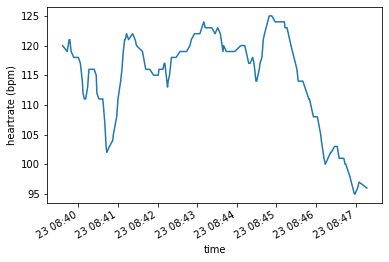

In [7]:
track.plot('th')

In [20]:
track.data.plot(y='heartrate (bpm)', grid=True, style='-r')

TypeError: no numeric data to plot

In [28]:
track.heartrate

array(['120', '119', '121', '121', '119', '118', '118', '118', '117',
       '114', '112', '111', '111', '113', '116', '116', '116', '116',
       '115', '112', '111', '111', '107', '103', '102', '103', '104',
       '105', '108', '111', '114', '116', '119', '121', '121', '122',
       '121', '122', '121', '120', '119', '116', '116', '116', '115',
       '115', '115', '116', '116', '117', '117', '113', '114', '115',
       '118', '118', '118', '119', '119', '119', '119', '120', '121',
       '122', '122', '122', '124', '123', '123', '123', '122', '123',
       '122', '119', '120', '119', '119', '119', '120', '120', '117',
       '117', '118', '117', '114', '114', '116', '117', '118', '121',
       '122', '125', '125', '124', '124', '124', '124', '124', '124',
       '124', '124', '123', '123', '120', '116', '114', '114', '111',
       '111', '108', '108', '105', '104', '101', '100', '102', '102',
       '103', '103', '103', '103', '101', '101', '101', '101', '100',
       '100', '98', 